# Lab 5: Advanced Missing Data Imputation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
import math
import numpy as np

# Enable inline plotting
%matplotlib inline

## Advanced Regression Models

In the previous lecture, we discussed advanced regression models including neural networks and k-nearest neighbours (kNN). But in the previous lab, we only looked at using linear regression in sklearn. Now we'll try the more advanced models. Fortunately, sklearn makes it very easy to swap in different machine learning models.

Let's start with the same college dataset we used previously.

In [ ]:
df = pd.read_csv('College-MISSING.csv')
print(df.head())

Let's predict graduation rate (Grad.Rate) based on the other variables. So Grad.Rate will be our outcome (y) and the other variables will be our features (X). 

But first we will remove missing data.

# Removing Missing Data

We will remove any rows with missing (NA) data, in order to fit our advanced regression models.

In [ ]:
df_complete = df.dropna(axis=0, how='any')
print(df_complete.head())

Then we will divide that into features (X) and outcomes (y), as before. We also add a line of code that scales the variables (preprocessing.scale(X)), as neural networks usually perform better when all the features are on roughly the same scale. If you remove this, you will likely see performance go down. 

In [ ]:
X = df_complete.drop(['College', 'Private', 'Grad.Rate'], axis=1)
X = pd.DataFrame(preprocessing.scale(X), columns=X.columns)
print("Here are the features (X):")
print(X.head())

print("\n\nHere is the outcome variable (y):")
y = df_complete['Grad.Rate']
print(y)

In [ ]:
print(df_complete.head())

## Advanced Regression Models in sklearn

In the previous lecture, we described a simple Perceptron as being like a single neuron, and a neural network being an extension of the Perceptron where we have multiple neurons arranged in layers, including hidden layers between the inputs and outputs. So multi-layer perceptron (or MLP) is just another term for neural network.

We will fit a neural network regression model to predict Grad.Rate, just like in the previous lab.


We create an instance of the MLPRegressor class in sklearn. We need to specify how many hidden layers it should have and how many neurons in each of those layers. In this case, it's three hidden layers, with sizes of 100, 100, and 50, respectively. The other arguments specify which training algorithm it should use for learning the neural network weights, and the maximum number of iterations it should try.

In [ ]:
lm1 = MLPRegressor(hidden_layer_sizes=(100,100,50), solver='lbfgs', max_iter=500, random_state=1)

We then fit the model to the training data. Thankfully, sklearn provides a consistent API for the various machine learning models. So training and prediction is just the same as it was before. 

In [ ]:
lm1.fit(X, y)

Let's also create a kNN regression model. We can specify the value of _k_ or use the default of 5.

In [ ]:
lm2 = KNeighborsRegressor(10)

Then we fit that model to the data as well.

In [ ]:
lm2.fit(X,y)

# Imputation

Then we want to get predictions on the full dataset, including the rows that had missing (NA) data, so that we can impute the missing values using our trained regression model. 

So we need to get the features (X) for the entire dataset, not just the complete cases.

In [ ]:
X_all = df.drop(['College', 'Private', 'Grad.Rate'], axis=1)
X_all = pd.DataFrame(preprocessing.scale(X_all), columns=X_all.columns)

preds1 = lm1.predict(X_all)

preds2 = lm2.predict(X_all)


Or we could get predictions for just the records where Grad.Rate was missing:

In [ ]:
missing = df['Grad.Rate'].isnull()

preds_missing1 = lm1.predict(X_all.loc[missing, :])

preds_missing2 = lm2.predict(X_all.loc[missing, :])



# Evaluation

Let's do a similar step as you did in the first part of your lab assignment last week. We will look at the gold-standard Grad.Rate values in _College.csv_ and see how our predictions compare. But this time we will only look at the subset of the data that was missing.

In [ ]:
gs_df = pd.read_csv('College.csv')
gs_grad = gs_df.loc[missing, 'Grad.Rate']

plt.figure()
plt.scatter(preds_missing1, gs_grad)
plt.xlabel("Predicted Grad Rate (NN)")
plt.ylabel("Actual Grad Rate")
plt.show()

plt.figure()
plt.scatter(preds_missing2, gs_grad)
plt.xlabel("Predicted Grad Rate (kNN)")
plt.ylabel("Actual Grad Rate")
plt.show()

It can be difficult to assess which approach is doing better just by looking at the scatter plots. 

Let's calculate the mean-squared error (MSE) for each.

In [ ]:
mse = sum((gs_grad - preds_missing1)**2) / len(preds_missing1)
print("MSE with MLP regressor: ", mse)

In [ ]:
mse = sum((gs_grad - preds_missing2)**2) / len(preds_missing2)
print("MSE with kNN regressor: ", mse)

Your results may differ slightly, but you should see that kNN performs better on this task. However, you might get significant improvement by trying different numbers of hidden layers and neurons. Neural networks also tend to perform better on larger datasets. If you remove the lines of code that do feature scaling, you should see neural networks perform much worse.

__Lab Assignment__: You are provided with a dataset _winequality-MISSING.csv_ that has some data about different wines, and how each wine was rated. Some of the wine ratings are missing. Try fitting advanced regression models using neural networks and kNN to predict the missing rating values. 

Then load in the gold-standard data in winequality.csv and compare your predicted values for the missing ratings with the actual ratings. Show scatterplots of the predicted vs. actual ratings for the missing data, for both models. Also show the MSE for each predictive model.

In [2]:
df1 = pd.read_csv('winequality-MISSING.csv')
print(df1.head())

   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

In [4]:
df1_complete = df1.dropna(axis=0, how='any')
print(df1_complete.head())

   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

In [6]:
X1 = df1_complete.drop(['quality'], axis=1)
X1 = pd.DataFrame(preprocessing.scale(X1), columns=X1.columns)
print("Here are the features (X):")
print(X1.head())

print("\n\nHere is the outcome variable (y):")
y1 = df1_complete['quality']
print(y1)

Here are the features (X):
   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0      -0.482203          0.919600    -1.412761       -0.429847  -0.239792   
1      -0.235299          1.921989    -1.412761        0.083039   0.287224   
2      -0.235299          1.253729    -1.183658       -0.136770   0.143492   
3       1.863383         -1.419309     1.794675       -0.429847  -0.263748   
4      -0.482203          0.919600    -1.412761       -0.429847  -0.239792   

   free.sulfur.dioxide  total.sulfur.dioxide   density        pH  sulphates  \
0            -0.491477             -0.405860  0.607419  1.257952  -0.560647   
1             0.844059              0.618829  0.065035 -0.789252   0.164119   
2            -0.109896              0.215164  0.173512 -0.393019  -0.017072   
3             0.080895              0.401471  0.715896 -1.053408  -0.439853   
4            -0.491477             -0.405860  0.607419  1.257952  -0.560647   

    alcohol  
0 -0.928741  
1

In [7]:
print(df1_complete.head())

   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

In [15]:
lm3 = MLPRegressor(hidden_layer_sizes=(100,100,50), solver='lbfgs', max_iter=1550, random_state=1)

In [16]:
lm3.fit(X1, y1)

MLPRegressor(hidden_layer_sizes=(100, 100, 50), max_iter=10000, random_state=1,
             solver='lbfgs')

In [17]:
lm4 = KNeighborsRegressor(10)

In [18]:
lm4.fit(X1,y1)

KNeighborsRegressor(n_neighbors=10)

In [19]:
X1_all = df1.drop(['quality'], axis=1)
X1_all = pd.DataFrame(preprocessing.scale(X1_all), columns=X1_all.columns)
missing = df1['quality'].isnull()

preds_missing1 = lm3.predict(X1_all.loc[missing, :])

preds_missing2 = lm4.predict(X1_all.loc[missing, :])


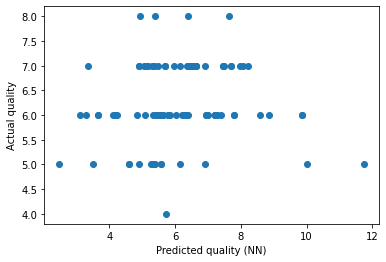

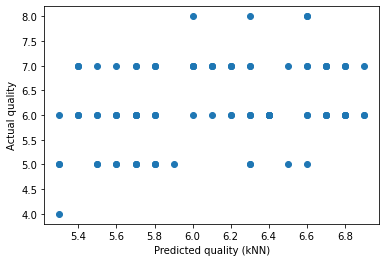

In [20]:
gs_df1 = pd.read_csv('winequality.csv')
gs_grad1 = gs_df1.loc[missing, 'quality']

plt.figure()
plt.scatter(preds_missing1, gs_grad1)
plt.xlabel("Predicted quality (NN)")
plt.ylabel("Actual quality")
plt.show()

plt.figure()
plt.scatter(preds_missing2, gs_grad1)
plt.xlabel("Predicted quality (kNN)")
plt.ylabel("Actual quality")
plt.show()

In [21]:
mse = sum((gs_grad1 - preds_missing1)**2) / len(preds_missing1)
print("MSE with MLP regressor: ", mse)

MSE with MLP regressor:  2.8090811102936475


In [22]:
mse = sum((gs_grad1 - preds_missing2)**2) / len(preds_missing2)
print("MSE with kNN regressor: ", mse)

MSE with kNN regressor:  0.6906060606060613
